# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
# Testing variable storage
my_btc

1.2

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
my_btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
my_eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crypto
my_btc_value = my_btc_price * my_btc 
my_eth_value = my_eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $55498.80
The current value of your 5.3 ETH is $7634.49


## Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_key2 = os.getenv("API_SECRET_KEY")
base_url = "https://paper-api.alpaca.markets"
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_key2,
    base_url,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-02-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date,
).df

# Preview DataFrame
portfolio_df

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-02-22 00:00:00-05:00  115.76  115.8662  115.48  115.49  4704520  387.06   

                                                             
                             high     low   close    volume  
time                                                         
2021-02-22 00:00:00-05:00  389.62  386.74  387.11  56604869

In [9]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_df["AGG"]["close"][0]
spy_close_price = portfolio_df["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.49
Current SPY closing price: $387.11


In [10]:
# Compute the current value of shares
agg_value = my_agg * agg_close_price
spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19355.50
The current value of your 200 AGG shares is $23098.00


### Savings Health Analysis

In [102]:
#import pandas as pd
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
#Creating list for plot
#my_list = {"amount" : ["crypto", "shares"], "1":[my_btc_value+my_eth_value], "2":[agg_value+spy_value]}
#my_list.set_index(0)

#df_savings = pd.Dataframe(my_savings, columns = ["amount"][crypto, shares])
df_savings = pd.DataFrame({ "amounts" : [my_btc_value+my_eth_value, agg_value+spy_value]})
df_savings.index=["crypto", "shares"]

# Display savings DataFrame
df_savings.head()

,amounts
crypto,63133.291
shares,42453.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amounts'>

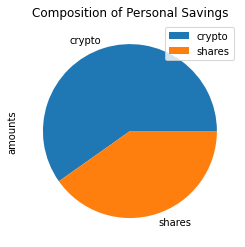

In [104]:
# Plot savings pie chart
df_savings.plot.pie(y=0, title="Composition of Personal Savings")

In [113]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
emergency_fund

# Validate saving health
if df_savings > emergency_fund: 
    print("Congratulations, your emergency fund is well funded")
if df_savings == emergency_fund:
    print("Congratulations, you have reached your goal")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [12]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-02-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-02-22', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1D"
tickers = ["AGG", "SPY"]
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2020-09-29 00:00:00-04:00  118.28  118.33  118.2100  118.23  3974292  333.97   
2020-09-30 00:00:00-04:00  118.26  118.26  117.9516  118.07  5314447  333.09   
2020-10-01 00:00:00-04:00  117.81  118.04  117.7500  117.99  9535086  337.69   
2020-10-02 00:00:00-04:00  118.03  118.04  117.8100  117.92  5356203  331.70   
2020-10-05 00:00:00-04:00  117.74  117.74  117.5200  117.52  4343747  336.06   

                                                                 
                               high       low   close    volume  
time                                                             
2020-09-29 00:00:00-04:00  334.7700  331.6209  332.39  40380416  
2020-09-30 00:00:00-04:00  338.2900  332.8800  334.89  78401575  
2020-10-01 00:00:00-04:00  338.7400  335.0100  337.03  76998987  
2020-10-02 00:00:00-04:00  337.0126  331.1900  333.87  72640620  
2020-10-05 00:00:00-04:00  339.9600  336.0100  339.73  38510456

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days =252*30
)

In [21]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2020-09-29 00:00:00-04:00  118.28  118.33  118.2100  118.23  3974292   
2020-09-30 00:00:00-04:00  118.26  118.26  117.9516  118.07  5314447   
2020-10-01 00:00:00-04:00  117.81  118.04  117.7500  117.99  9535086   
2020-10-02 00:00:00-04:00  118.03  118.04  117.8100  117.92  5356203   
2020-10-05 00:00:00-04:00  117.74  117.74  117.5200  117.52  4343747   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-09-29 00:00:00-04:00          NaN  333.97  334.7700  331.6209  332.39   
2020-09-30 00:00:00-04:00    -0.001353  333.09  338.2900  332.8800  334.89   
2020-10-01 00:00:00-04:00    -0.000678  337.69  338.7400  335.0100  337.03   
2020-10-02 00:00:00-04:00    -0.000593  331.70  337.0126  331.1900  333.87   
2020-10-05 00:00:00-04:00    -0.003392  336.06  339.9600  336.0100  339.73   

                                                  
                             volume daily_return  
time                                              
2020-09-29 00:00:00-04:00  40380416          NaN  
2020-09-30 00:00:00-04:00  78401575     0.007521  
2020-10-01 00:00:00-04:00  76998987     0.006390  
2020-10-02 00:00:00-04:00  72640620    -0.009376  
2020-10-05 00:00:00-04:00  38510456     0.017552

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003540,0.992360,0.991729,1.011036,1.007127,1.006669,0.992741,0.993124,0.991111,0.998012,...,1.000769,1.001276,0.993517,1.002125,1.003816,0.995535,1.008155,0.998371,0.996597,0.995626
2,1.000171,0.994348,0.994872,1.012658,1.004641,1.011059,0.994312,0.987484,0.975569,0.990837,...,1.005823,1.005193,0.998990,1.008895,1.003603,0.990676,1.016509,0.992667,1.004663,1.004656
3,1.000537,0.990897,0.996196,1.008659,1.004751,1.002979,1.006012,0.984838,0.961017,0.994726,...,1.017410,1.003157,0.994102,1.016600,0.994277,1.000021,1.015021,0.995366,1.011013,1.007692
4,0.999951,0.992193,0.991682,1.005132,1.002327,1.011155,1.009620,0.978408,0.956625,0.986308,...,1.014755,0.991856,0.990671,1.025002,0.993542,1.007993,1.023956,0.993421,1.008581,1.019099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1839.100564,593.656113,1049.614452,213.320685,478.943600,1085.761162,667.893074,613.572526,289.457189,592.333003,...,814.324063,153.143208,865.030169,541.058366,733.263261,622.442013,520.767412,428.940706,297.627434,479.401110
7557,1846.093138,597.291064,1051.255880,212.933763,475.897974,1090.251291,672.143554,613.269262,288.920381,590.717678,...,808.715348,153.034681,864.130837,543.275562,734.212771,619.781180,519.323428,429.457310,296.466954,483.084059
7558,1854.528944,595.519902,1048.391983,214.164142,474.551728,1090.897250,668.893059,615.651338,288.112082,600.090466,...,811.310081,154.361166,858.082135,544.996311,738.074635,623.223410,518.150553,427.724019,295.694222,488.192965
7559,1847.631252,594.862792,1052.573456,214.432462,478.024318,1094.200895,670.712389,617.932016,286.291271,600.313387,...,809.230266,155.620675,858.669757,549.063013,736.330398,625.712018,517.845690,427.743375,296.368780,489.631926


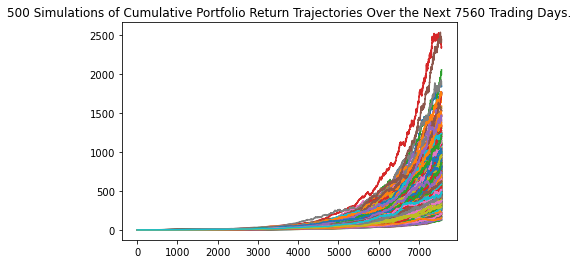

In [23]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

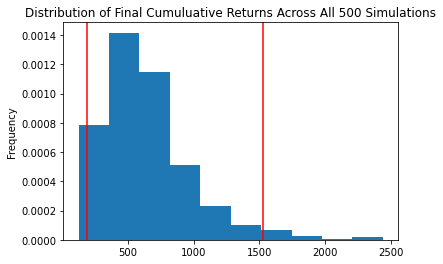

In [24]:
# Plot probability distribution and confidence intervals
distro_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
ty_results = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(ty_results)

count            500.000000
mean             644.045207
std              343.585320
min              124.637431
25%              408.236434
50%              577.646991
75%              805.171324
max             2441.539495
95% CI Lower     185.934150
95% CI Upper    1530.171787
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(ty_results[8]*20000*2)
ci_upper=round(ty_results[9]*20000*2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $7437366 and $61206871


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(ty_results[8]*20000*2)
ci_upper=round(ty_results[9]*20000*2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $7437366 and $61206871


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days =252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009791,0.998963,1.002216,1.007575,1.014574,0.995604,1.003403,0.990756,1.007644,1.002092,...,1.007037,1.018258,0.998219,1.005689,0.994728,0.998118,0.990653,0.998524,1.015553,1.000370
2,1.015496,1.011449,0.999652,1.012404,1.020532,0.996320,1.004328,0.997212,1.013713,1.000256,...,1.018644,1.013092,1.001130,1.008121,0.994773,0.997783,0.981150,1.007870,1.021774,0.996741
3,1.009831,1.015055,0.997879,1.004698,1.017755,0.991288,1.005495,0.989681,1.014489,1.009592,...,1.019326,1.012459,1.021256,1.011178,1.002440,0.984634,0.972007,0.997370,1.005983,1.012695
4,1.012732,1.020437,1.010948,1.013990,1.024211,0.990262,1.006647,0.988273,1.012414,1.012883,...,1.019627,1.003635,1.023419,1.020836,1.000565,0.988484,0.973371,1.003842,1.013927,1.016581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.773131,3.971103,2.435664,3.228875,2.677752,3.333668,3.248377,2.418888,3.318922,2.841885,...,2.349566,1.831173,2.589227,2.785848,3.616912,3.232610,2.879694,2.880403,2.899871,2.091309
1257,2.789190,3.988789,2.455001,3.233281,2.653734,3.358486,3.225012,2.418131,3.295398,2.850422,...,2.347126,1.825996,2.561374,2.773879,3.594823,3.238562,2.875589,2.881869,2.904592,2.099900
1258,2.815205,3.949519,2.447240,3.216803,2.655399,3.362403,3.225437,2.422564,3.317311,2.859614,...,2.341256,1.829921,2.557802,2.796391,3.643494,3.266972,2.900060,2.897850,2.908792,2.082100
1259,2.806331,3.953573,2.490244,3.196902,2.655608,3.358162,3.213402,2.422264,3.306785,2.837919,...,2.354745,1.838910,2.550980,2.803273,3.648906,3.274738,2.901967,2.915083,2.904567,2.083456


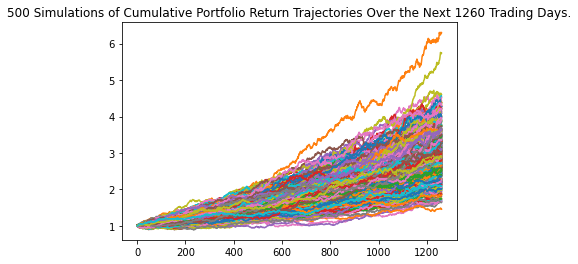

In [33]:
# Plot simulation outcomes
five_plot=MC_five.plot_simulation()

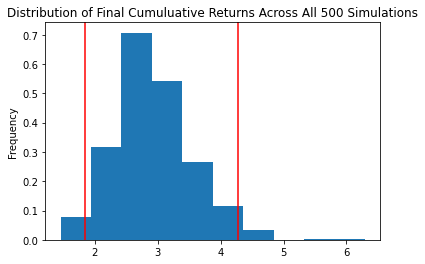

In [34]:
# Plot probability distribution and confidence intervals
five_distro = MC_five.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
five_summ = MC_five.summarize_cumulative_return()
# Print summary statistics
print(five_summ)

count           500.000000
mean              2.929974
std               0.624607
min               1.456718
25%               2.536947
50%               2.871633
75%               3.304246
max               6.293152
95% CI Lower      1.851063
95% CI Upper      4.284430
Name: 1260, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(five_summ[8]*60000*2)
ci_upper_five=round(five_summ[9]*60000*2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $222128 and $514132


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days =252*10
)

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001911,0.999969,1.007050,0.991421,1.001415,0.995629,1.007268,1.001809,0.993930,1.000360,...,1.005342,1.001456,0.991474,0.993584,1.002707,0.998123,0.989730,0.993354,0.997971,1.004486
2,1.008697,0.997871,1.002221,0.990614,0.997028,0.997090,1.010134,0.992487,1.002499,1.005666,...,1.010585,0.997119,0.997641,1.000974,1.004549,0.998654,0.980426,0.996096,0.993200,0.999109
3,1.015996,0.988456,0.986719,0.992894,0.998726,0.994018,1.007359,0.990873,0.993191,1.000459,...,1.014868,1.001384,0.994956,0.994549,1.011480,1.014455,0.990308,1.000904,0.996282,0.998190
4,1.015434,0.998907,0.979003,0.993677,0.992326,0.989862,0.998079,0.995923,0.997665,0.994726,...,1.011869,1.007842,0.986692,0.992989,1.022271,1.010554,0.996332,1.007509,0.998732,0.993002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,10.600127,9.376550,15.269763,6.989338,11.390937,13.431571,11.632637,8.138519,8.861394,9.838507,...,17.391894,8.085969,7.950768,8.773585,7.814797,5.990494,6.569581,7.513771,5.200427,9.784399
2517,10.538159,9.397307,15.187075,6.915913,11.463105,13.395660,11.634926,8.254498,8.893596,9.928371,...,17.283572,8.156629,7.843751,8.751563,7.842025,5.948574,6.609585,7.590869,5.218288,9.892635
2518,10.581879,9.425655,15.198323,6.953541,11.491164,13.454468,11.821940,8.199871,8.891240,10.034496,...,17.210141,8.136742,7.788856,8.706196,7.832994,5.964465,6.568377,7.697774,5.200353,9.890910
2519,10.557564,9.362780,15.151802,6.976241,11.498305,13.463171,11.786473,8.196891,8.920538,10.058599,...,17.216018,8.178883,7.815770,8.737535,7.874954,5.974098,6.595940,7.679324,5.256558,9.892644


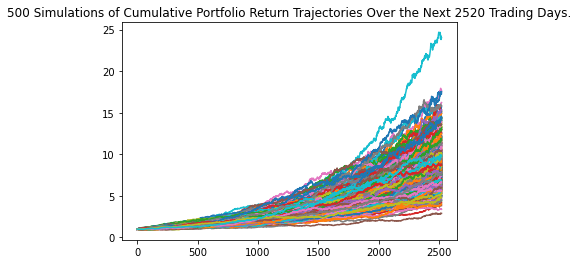

In [40]:
# Plot simulation outcomes
ten_plot=MC_ten.plot_simulation()

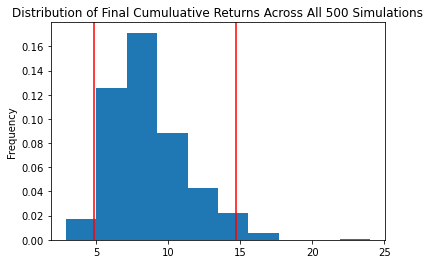

In [41]:
# Plot probability distribution and confidence intervals
ten_distro = MC_ten.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_summ = MC_ten.summarize_cumulative_return()
# Print summary statistics
print(ten_summ)

count           500.000000
mean              8.629131
std               2.649769
min               2.888166
25%               6.746809
50%               8.199384
75%              10.019787
max              24.010813
95% CI Lower      4.848009
95% CI Upper     14.704030
Name: 2520, dtype: float64


In [43]:
# Set initial investment
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=round(ten_summ[8]*60000*2)
ci_upper_ten=round(ten_summ[9]*60000*2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $581761 and $1764484
